# Анализ рынка заведений общественного питания Москвы

## Загрузка данных и подготовка их к анализу.

### Импортируем нужные модули.

In [ ]:
import pandas as pd
import os
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import scipy.stats as stats
import math as mth
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

### Загрузим данные.

In [ ]:
path = '/datasets/moscow_places.csv'

if os.path.exists(path):
    data = pd.read_csv(path)
else:
    print('Something is wrong')

In [ ]:
data

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,NaN,NaN,NaN,NaN,0,NaN
1,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,0,4.0
2,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",55.889146,37.525901,4.6,средние,Средний счёт:от 1000 ₽,1000.0,NaN,0,45.0
3,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,0,NaN
4,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",55.881166,37.449357,5.0,средние,Средний счёт:400–600 ₽,500.0,NaN,1,148.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8401,Суши Мания,кафе,"Москва, Профсоюзная улица, 56",Юго-Западный административный округ,"ежедневно, 09:00–02:00",55.670021,37.552480,4.4,NaN,NaN,NaN,NaN,0,86.0
8402,Миславнес,кафе,"Москва, Пролетарский проспект, 19, корп. 1",Южный административный округ,"ежедневно, 08:00–22:00",55.640875,37.656553,4.8,NaN,NaN,NaN,NaN,0,150.0
8403,Самовар,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",55.648859,37.743219,3.9,NaN,Средний счёт:от 150 ₽,150.0,NaN,0,150.0
8404,Чайхана Sabr,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",55.648849,37.743222,4.2,NaN,NaN,NaN,NaN,1,150.0


### Изучение представленных данных.

1. Опишем, что значит каждый столбец в датафрейме.

**Файл 'moscow_places' содержит информацию:**
* name — название заведения;
* address — адрес заведения;
* category — категория заведения, например «кафе», «пиццерия» или «кофейня»;
* hours — информация о днях и часах работы;
* lat — широта географической точки, в которой находится заведение;
* lng — долгота географической точки, в которой находится заведение;
* rating — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
* price — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
* avg_bill — строка, которая хранит среднюю стоимость заказа в виде диапазона.
* middle_avg_bill — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:
* middle_coffee_cup — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:
* chain — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
* district — административный район, в котором находится заведение, например Центральный административный округ;
* seats — количество посадочных мест.

2. Определим размерность нашего датафрейма.

In [ ]:
data.shape

(8406, 14)

**Вывод:** из выведенных данных, мы можем заметить, что датафрейм состоит из 8406 записей и 14 полей.

3. Выведем общую информацию с помощью метода info().

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              4795 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 919.5+ KB


**Вывод:** из выведенных данных, мы можем заметить, что в датафрейме присутствуют пропуски, названия столбцов написаны в правильном формате, таблицу необходимо проверить на наличие аномалий, а также проверить тип данных у всех столбцов.

4. Выведем общую информацию о данных типа 'float64' с помощью метода - describe()

In [ ]:
data.describe().astype('float64')

,lat,lng,rating,middle_avg_bill,middle_coffee_cup,chain,seats
count,8406.000000,8406.000000,8406.000000,3149.000000,535.000000,8406.000000,4795.000000
mean,55.750109,37.608570,4.229895,958.053668,174.721495,0.381275,108.421689
std,0.069658,0.098597,0.470348,1009.732845,88.951103,0.485729,122.833396
min,55.573942,37.355651,1.000000,0.000000,60.000000,0.000000,0.000000
25%,55.705155,37.538583,4.100000,375.000000,124.500000,0.000000,40.000000
50%,55.753425,37.605246,4.300000,750.000000,169.000000,0.000000,75.000000
75%,55.795041,37.664792,4.400000,1250.000000,225.000000,1.000000,140.000000
max,55.928943,37.874466,5.000000,35000.000000,1568.000000,1.000000,1288.000000


**Вывод:** На текущий момент, мы можем сделать некоторые выводы: средний рейтинг заведений около ±4.23 из 5, средний чек около 958 рублей, средняя стоимость одного стакана кофе около 174 рублей. 

5. С помощью метода hist() выведем возможные графики для визуализации.

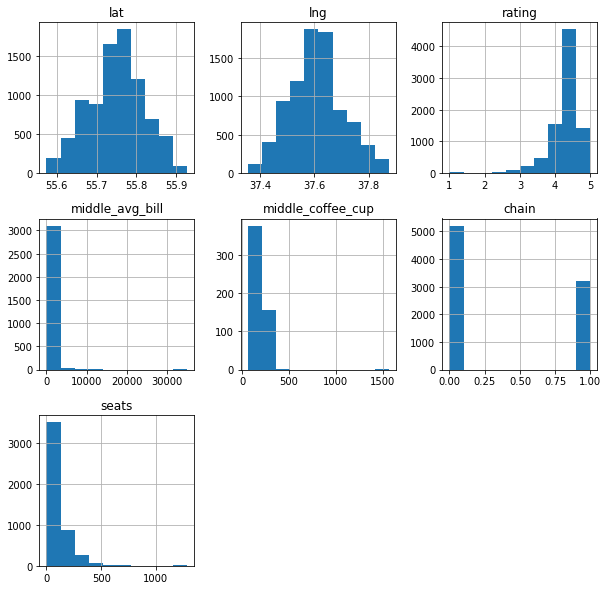

In [ ]:
data.hist(figsize=(10,10));

**Вывод:** с помощью функции hist() было выведено 7 графиков на разные виды данных. По ним тяжело что-то сказать, так как данные еще не были преобработаны, но как и из прошлого шага, можем сделать предположительные выводы: рейтинг заведений преобладает от 4 до 5, преимущественно заведения не являются сетевыми, а количество мест в них неболее 110.



### Преобработка данных.

#### Предобработка данных столбца 'name'.

1. Для общего понимания выведем 15 строк данного столбца.

In [ ]:
data['name'].head(15)

0                   WoWфли
1           Четыре комнаты
2                    Хазри
3     Dormouse Coffee Shop
4                Иль Марко
5             Sergio Pizza
6              Огни города
7               Mr. Уголёк
8              Donna Maria
9                   Готика
10          Great Room Bar
11             Шашлык Шефф
12                Заправка
13                 Буханка
14                У Сильвы
Name: name, dtype: object

2. Проверим столбец на пропуски.

In [ ]:
data['name'].isna().sum()

0

**Вывод:** в столбце пропуски отсутствуют.

3. Проверим столбец на дубликаты.

In [ ]:
data['name'].duplicated().sum()

2792

**Вывод:** мы видим, что в данном столбце присутстуют дубликаты, но не стоит забывать, что в датафрейме есть сетевые заведения, которых в Москве может быть несколько штук, поэтому их мы удалять не будем. 

4. Проверим столбец на тип данных.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              4795 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 919.5+ KB


**Вывод:** тип данных столбца - 'object', выбран верно.

#### Предобработка данных столбца 'category'.

1. Для наглядности выведем 15 строк данного столбца.

In [ ]:
data['category'].head(15)

0                кафе
1            ресторан
2                кафе
3             кофейня
4            пиццерия
5            пиццерия
6             бар,паб
7     быстрое питание
8            ресторан
9                кафе
10            бар,паб
11               кафе
12               кафе
13           булочная
14            бар,паб
Name: category, dtype: object

2. Проверим столбец на пропуски.

In [ ]:
data['category'].isna().sum()

0

**Вывод:** в столбце пропуски отсутствуют.

3. Выведем все уникальные значения в даннном столбце.

In [ ]:
data['category'].unique()

array(['кафе', 'ресторан', 'кофейня', 'пиццерия', 'бар,паб',
       'быстрое питание', 'булочная', 'столовая'], dtype=object)

**Вывод:** в столбце присутствует 9 уникальных видов категорий. Неявных дубликатов не обнуружено. На дубликаты проверять столбец нет смысла.

4. Проверим столбец на тип данных.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              4795 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 919.5+ KB


**Вывод:** тип данных столбца - 'object', выбран верно.

#### Предобработка данных столбца 'address'.

1. Для наглядности выведем 15 строк данного столбца.

In [ ]:
data['address'].head(15)

0                  Москва, улица Дыбенко, 7/1
1          Москва, улица Дыбенко, 36, корп. 1
2              Москва, Клязьминская улица, 15
3         Москва, улица Маршала Федоренко, 12
4             Москва, Правобережная улица, 1Б
5                Москва, Ижорская улица, вл8Б
6       Москва, Клязьминская улица, 9, стр. 3
7       Москва, Клязьминская улица, 9, стр. 3
8     Москва, Дмитровское шоссе, 107, корп. 4
9                 Москва, Ангарская улица, 39
10             Москва, Левобережная улица, 12
11      Москва, улица Маршала Федоренко, 10с1
12             Москва, МКАД, 80-й километр, 1
13       Москва, Базовская улица, 15, корп. 1
14              Москва, Ангарская улица, 42с1
Name: address, dtype: object

2. Проверим столбец на пропуски.

In [ ]:
data['address'].isna().sum()

0

**Вывод:** в столбце пропуски отсутствуют.

3. Проверим столбец на дубликаты.

In [ ]:
data['address'].duplicated().sum()

2653

**Вывод:** мы видим, что в данном столбце, присутствуют дубликаты. Удалять мы их не будем, так как есть вероятность того, что некоторые заведения, могут находиться в одном и том же здании.

4. Проверим столбец на тип данных.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              4795 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 919.5+ KB


**Вывод:** тип данных столбца - 'object', выбран верно.

#### Предобработка данных столбца 'district'.

1. Для наглядности выведем последние 15 строк данного столбца.

In [ ]:
data['district'].tail(15)

8391    Юго-Восточный административный округ
8392        Восточный административный округ
8393    Юго-Восточный административный округ
8394    Юго-Восточный административный округ
8395    Юго-Восточный административный округ
8396         Западный административный округ
8397         Западный административный округ
8398     Юго-Западный административный округ
8399     Юго-Западный административный округ
8400     Юго-Западный административный округ
8401     Юго-Западный административный округ
8402            Южный административный округ
8403    Юго-Восточный административный округ
8404    Юго-Восточный административный округ
8405            Южный административный округ
Name: district, dtype: object

2. Проверим столбец на пропуски.

In [ ]:
data['district'].isna().sum()

0

**Вывод:** в столбце пропуски отсутствуют.

3. Выведем все уникальные значения данного столбца.

In [ ]:
data['district'].unique()

array(['Северный административный округ',
       'Северо-Восточный административный округ',
       'Северо-Западный административный округ',
       'Западный административный округ',
       'Центральный административный округ',
       'Восточный административный округ',
       'Юго-Восточный административный округ',
       'Южный административный округ',
       'Юго-Западный административный округ'], dtype=object)

**Вывод:** в датафрейме присутсует информация о 9 районах Москвы. На дубликаты проверять столбец нет смысла.

4. Проверим тип данных столбца.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              4795 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 919.5+ KB


**Вывод:** тип данных столбца - 'object', выбран верно.

#### Предобработка данных столбца 'hours'.

1. Для наглядности выведем первые 10 строк данного столбца.

In [ ]:
data['hours'].head(10)

0                               ежедневно, 10:00–22:00
1                               ежедневно, 10:00–22:00
2    пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...
3                               ежедневно, 09:00–22:00
4                               ежедневно, 10:00–22:00
5                               ежедневно, 10:00–23:00
6                    пн 15:00–04:00; вт-вс 15:00–05:00
7    пн-чт 10:00–22:00; пт,сб 10:00–23:00; вс 10:00...
8                               ежедневно, 10:00–22:00
9                               ежедневно, 12:00–00:00
Name: hours, dtype: object

2. Проверим столбец на пропуски.


In [ ]:
data['hours'].isna().sum()

536

**Вывод:** в столбце присутстует 536 пропусков, скорей всего, время работы не было указано.

3. Заменим пропуски на значение 'Не указано'.

In [ ]:
data['hours'] = data['hours'].fillna('Не указано')

4. Проверим тип данных.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              8406 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              4795 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 919.5+ KB


**Вывод:** тип данных столбца - 'object', выбран верно.

#### Предобработка данных столбцов 'lat' и 'lng'.

1. Так как столбцы 'lat' и 'lng' содержат в себе координаты заведения, предлагаю предобработать их вместе. Выведем первые 10 строк.

In [ ]:
data[['lat', 'lng']].head(10)

,lat,lng
0,55.878494,37.478860
1,55.875801,37.484479
2,55.889146,37.525901
3,55.881608,37.488860
4,55.881166,37.449357
5,55.888010,37.509573
6,55.890752,37.524653
7,55.890636,37.524303
8,55.880045,37.539006
9,55.879038,37.524487


2. Проверим на пропуски.

In [ ]:
data[['lat', 'lng']].isna().sum()

lat    0
lng    0
dtype: int64

**Вывод:** в столбцах пропуски отсутствуют.

3. Проверим столбцы на дубликаты.

In [ ]:
data[['lat', 'lng']].duplicated().sum()

34

**Вывод:** в столбце присутствует 34 дубликат, скорей всего, заведения находятся в одном и том же здании, их удалять не будем.

#### Предобработка данных столбцов 'rating'.

1. Выведем первые 10 строк данного столбца.

In [ ]:
data['rating'].head(10)

0    5.0
1    4.5
2    4.6
3    5.0
4    5.0
5    4.6
6    4.4
7    4.7
8    4.8
9    4.3
Name: rating, dtype: float64

2. Проверим столбец на пропуски.

In [ ]:
data['rating'].isna().sum()

0

**Вывод:** в столбце пропуски отсутствуют.

3. Проверим тип данных столбца.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              8406 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              4795 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 919.5+ KB


**Вывод:** тип данных выбран верно.

#### Предобработка данных столбцов 'price'.

1. Выведем первые 10 строк данного столбца.

In [ ]:
data['price'].head()

0              NaN
1    выше среднего
2          средние
3              NaN
4          средние
Name: price, dtype: object

2. Посчитаем, сколько пропусков в столбце.

In [ ]:
data['price'].isna().sum()

5091

3. Вместо пропусков укажем, что значения были не указаны, чтобы в дальнейшем использовать эту информацию для подсчета.

In [ ]:
data['price'] = data['price'].fillna('Не указано')

**Вывод:** в столбце 5091 пропуск, удалять их не будем, а заменим на значение 'Не указано'.

3. Проверим тип данных столбца.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              8406 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              8406 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              4795 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 919.5+ KB


**Вывод:** тип данных был выбран верно.

#### Предобработка данных столбцов 'avg_bill'.

1. Выведем на экран первые 10 строк столбца.

In [ ]:
data['avg_bill'].head(10)

0                              NaN
1         Средний счёт:1500–1600 ₽
2           Средний счёт:от 1000 ₽
3    Цена чашки капучино:155–185 ₽
4           Средний счёт:400–600 ₽
5                              NaN
6               Средний счёт:199 ₽
7           Средний счёт:200–300 ₽
8            Средний счёт:от 500 ₽
9         Средний счёт:1000–1200 ₽
Name: avg_bill, dtype: object

2. Посчитаем количество пропусков.

In [ ]:
data['avg_bill'].isna().sum()

4590

**Вывод:** в столбце 4590 пропусков, скорей всего, цена была не указана. Предлагаю нулевое значение заменить на 'Не указано'

3. Заменим пропуски значением 'Не указано'.

In [ ]:
data['avg_bill'] = data['avg_bill'].fillna('Не указано')

4. Проверим тип данных.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              8406 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              8406 non-null   object 
 9   avg_bill           8406 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              4795 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 919.5+ KB


**Вывод:** так как в столбце помимо цен есть буквы, тип данных должен быть 'object'.

In [ ]:
data

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,Не указано,Не указано,NaN,NaN,0,NaN
1,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,0,4.0
2,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",55.889146,37.525901,4.6,средние,Средний счёт:от 1000 ₽,1000.0,NaN,0,45.0
3,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,Не указано,Цена чашки капучино:155–185 ₽,NaN,170.0,0,NaN
4,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",55.881166,37.449357,5.0,средние,Средний счёт:400–600 ₽,500.0,NaN,1,148.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8401,Суши Мания,кафе,"Москва, Профсоюзная улица, 56",Юго-Западный административный округ,"ежедневно, 09:00–02:00",55.670021,37.552480,4.4,Не указано,Не указано,NaN,NaN,0,86.0
8402,Миславнес,кафе,"Москва, Пролетарский проспект, 19, корп. 1",Южный административный округ,"ежедневно, 08:00–22:00",55.640875,37.656553,4.8,Не указано,Не указано,NaN,NaN,0,150.0
8403,Самовар,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",55.648859,37.743219,3.9,Не указано,Средний счёт:от 150 ₽,150.0,NaN,0,150.0
8404,Чайхана Sabr,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",55.648849,37.743222,4.2,Не указано,Не указано,NaN,NaN,1,150.0


#### Предобработка данных столбца 'middle_avg_bill'.

1. Выведем первые 10 строк данного столбца.

In [ ]:
data[['middle_avg_bill']].head(5)

,middle_avg_bill
0,NaN
1,1550.0
2,1000.0
3,NaN
4,500.0


2. Проверим столбец на пропуски.

In [ ]:
data['middle_avg_bill'].isna().sum()

5257

**Вывод:** в столбце 5257 пропусков, что больше половины. На ноль или 'заглушки' заменять нельзя, так как показатель среднего значения и медианы сильно измениться. Предлагаю оставить так, как есть.

3. Проверим тип данных.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              8406 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              8406 non-null   object 
 9   avg_bill           8406 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              4795 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 919.5+ KB


**Вывод:** так как столбце пропуски, мы не можем изменить столбец на тип данных 'int', оставляем как есть.

#### Предобработка данных столбца 'middle_coffee_cup'.

1. Выведем 10 первых строк столбца.

In [ ]:
data['middle_coffee_cup']

0         NaN
1         NaN
2         NaN
3       170.0
4         NaN
        ...  
8401      NaN
8402      NaN
8403      NaN
8404      NaN
8405      NaN
Name: middle_coffee_cup, Length: 8406, dtype: float64

2. Узнаем количество пропусков в столбце.

In [ ]:
data['middle_coffee_cup'].isna().sum()

7871

**Вывод:** в столбце 7871 пропуск, значения либо не указаны, либо такого товара в некоторых заведениях нет. Для того, чтобы не испортить данные, предлагаю не заменять пропуски на заглушки.

3. Узнаем тип данных.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              8406 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              8406 non-null   object 
 9   avg_bill           8406 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              4795 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 919.5+ KB


**Вывод:** тип данных 'float64' из-за пропусков поменять на другой мы не можем, оставляем всё как есть.

#### Предобработка данных столбца 'chain'.

1. Выведем 10 первых строк столбца.

In [ ]:
data['chain'].head(10)

0    0
1    0
2    0
3    0
4    1
5    0
6    0
7    0
8    0
9    0
Name: chain, dtype: int64

2. Узнаем количество пропусков.

In [ ]:
data['chain'].isna().sum()

0

**Вывод:** в данном столбце пропуски отсутствуют.

3. из 1 шага видим, что тип данных выбран верно.

#### Предобработка данных столбца 'seats'.

1. Выведем 10 первых строк столбца.

In [ ]:
data['seats'].head(10)

0      NaN
1      4.0
2     45.0
3      NaN
4    148.0
5      NaN
6     45.0
7     45.0
8     79.0
9     65.0
Name: seats, dtype: float64

2. Узнаем количество пропусков.

In [ ]:
data['seats'].isna().sum()

3611

**Вывод:** в столбце 3611 пропусков.

3. Предлагаю пропуски заменить на медианное значение столбца.

In [ ]:
# В переменную median_seats поместим меианное значение столбца
median_seats = data['seats'].median()

In [ ]:
data['seats'] = data['seats'].fillna(median_seats)

In [ ]:
data

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,Не указано,Не указано,NaN,NaN,0,75.0
1,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,0,4.0
2,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",55.889146,37.525901,4.6,средние,Средний счёт:от 1000 ₽,1000.0,NaN,0,45.0
3,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,Не указано,Цена чашки капучино:155–185 ₽,NaN,170.0,0,75.0
4,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",55.881166,37.449357,5.0,средние,Средний счёт:400–600 ₽,500.0,NaN,1,148.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8401,Суши Мания,кафе,"Москва, Профсоюзная улица, 56",Юго-Западный административный округ,"ежедневно, 09:00–02:00",55.670021,37.552480,4.4,Не указано,Не указано,NaN,NaN,0,86.0
8402,Миславнес,кафе,"Москва, Пролетарский проспект, 19, корп. 1",Южный административный округ,"ежедневно, 08:00–22:00",55.640875,37.656553,4.8,Не указано,Не указано,NaN,NaN,0,150.0
8403,Самовар,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",55.648859,37.743219,3.9,Не указано,Средний счёт:от 150 ₽,150.0,NaN,0,150.0
8404,Чайхана Sabr,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",55.648849,37.743222,4.2,Не указано,Не указано,NaN,NaN,1,150.0


4. Заменим тип данных с 'float64' на 'int64'

In [ ]:
data['seats'] = data['seats'].astype('int64')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              8406 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              8406 non-null   object 
 9   avg_bill           8406 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              8406 non-null   int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 919.5+ KB


### Добавление нового столбца 'street'.

1. Создадим столбец 'street' с названиями улиц из столбца с адресом.

In [ ]:
data['street'] = data['address'].str.split(',').str[1].str.strip()

In [ ]:
data

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,street
0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,Не указано,Не указано,NaN,NaN,0,75,улица Дыбенко
1,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,0,4,улица Дыбенко
2,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",55.889146,37.525901,4.6,средние,Средний счёт:от 1000 ₽,1000.0,NaN,0,45,Клязьминская улица
3,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,Не указано,Цена чашки капучино:155–185 ₽,NaN,170.0,0,75,улица Маршала Федоренко
4,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",55.881166,37.449357,5.0,средние,Средний счёт:400–600 ₽,500.0,NaN,1,148,Правобережная улица
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8401,Суши Мания,кафе,"Москва, Профсоюзная улица, 56",Юго-Западный административный округ,"ежедневно, 09:00–02:00",55.670021,37.552480,4.4,Не указано,Не указано,NaN,NaN,0,86,Профсоюзная улица
8402,Миславнес,кафе,"Москва, Пролетарский проспект, 19, корп. 1",Южный административный округ,"ежедневно, 08:00–22:00",55.640875,37.656553,4.8,Не указано,Не указано,NaN,NaN,0,150,Пролетарский проспект
8403,Самовар,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",55.648859,37.743219,3.9,Не указано,Средний счёт:от 150 ₽,150.0,NaN,0,150,Люблинская улица
8404,Чайхана Sabr,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",55.648849,37.743222,4.2,Не указано,Не указано,NaN,NaN,1,150,Люблинская улица


**Вывод:** был создан столбец 'street', в котором содержатся только названия улиц.

### Создадим столбец 'is_24/7' с обозначением, что заведение работает ежедневно и круглосуточно (24/7):

1. С помощью фильтрации создадим столбец 'is_24/7', который будет показывать, круглосуточно ли работает заведение.

In [ ]:
data['is_24/7'] = data['hours'].apply(lambda x: True if 'круглосуточно' in x else False)
data.loc[data['is_24/7'] == True, 'hours'] = 'ежедневно, круглосуточно'

In [ ]:
data

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,street,is_24/7
0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,Не указано,Не указано,NaN,NaN,0,75,улица Дыбенко,False
1,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,0,4,улица Дыбенко,False
2,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",55.889146,37.525901,4.6,средние,Средний счёт:от 1000 ₽,1000.0,NaN,0,45,Клязьминская улица,False
3,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,Не указано,Цена чашки капучино:155–185 ₽,NaN,170.0,0,75,улица Маршала Федоренко,False
4,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",55.881166,37.449357,5.0,средние,Средний счёт:400–600 ₽,500.0,NaN,1,148,Правобережная улица,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8401,Суши Мания,кафе,"Москва, Профсоюзная улица, 56",Юго-Западный административный округ,"ежедневно, 09:00–02:00",55.670021,37.552480,4.4,Не указано,Не указано,NaN,NaN,0,86,Профсоюзная улица,False
8402,Миславнес,кафе,"Москва, Пролетарский проспект, 19, корп. 1",Южный административный округ,"ежедневно, 08:00–22:00",55.640875,37.656553,4.8,Не указано,Не указано,NaN,NaN,0,150,Пролетарский проспект,False
8403,Самовар,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",55.648859,37.743219,3.9,Не указано,Средний счёт:от 150 ₽,150.0,NaN,0,150,Люблинская улица,True
8404,Чайхана Sabr,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",55.648849,37.743222,4.2,Не указано,Не указано,NaN,NaN,1,150,Люблинская улица,True


**Общий вывод по разделу:** в данном разделе мы загрузили основной датафрейм, предобработали его: удалили дубликаты, проверили на пропуски, в некоторых местах заменили пропуски на другие значения. Добавили два новых столбца: с улицей, где расположено каждое заведение и работает ли оно круглосуточно или нет. Датасет готов для дальнейшего анализа.